# Exercise Informed Search Algorithms #


In the last session, we implemented different systematic search strategies. If we want to find paths between different cities in a map, we can use additional information to guide our search. We don't rely on the 'blind' search and can implement more efficient algorithms, that consider the coordinates of the cities for example.

Implement the following algorithms and answer the same questions as you did for the systematic search algorithms.

1. Greedy Search
1. A* Algorithm
1. IDA* Search

In [1]:
import matplotlib.pyplot as plt

def plot_path(path, sbb):
    fig = plt.figure(figsize=(10,10))
    last_city = ""
    hub_coordinates = sbb.get_hub_locations()
    for city in path:
        if last_city == "":
            first_city = city;
        if last_city != "":
            plt.plot([hub_coordinates[city][0], hub_coordinates[last_city][0]], [hub_coordinates[city][1], hub_coordinates[last_city][1]], marker='.', color='black')
        plt.text(hub_coordinates[city][0]+0.01, hub_coordinates[city][1]+0.01, city, fontsize=9) 
        last_city = city;
    plt.axis('equal')

def return_path_list(node):
    path = []
    for child in node.path():
        path.append(child.state)
    return path

def print_info_about_search(node):
    print(node)
    print("The search algorithm reached " + node.state + " with a cost of " + str(node.path_cost) + ".")
    path = node.path()
    directions = ""
    for n in path:
        directions = directions + " > " + n.state
    print("The path is the following:" + directions)

### Greedy Search

In [64]:
from sbb import SBB
from search import *
import sys

sbb = SBB()
sbb.importData('linie-mit-betriebspunkten.json')

start = 'Rotkreuz'
goal = 'Urdorf'
sbb_map = UndirectedGraph(sbb.createMap())
problem = GraphProblem(start, goal, sbb_map)

# implement the informed search algorithms here

def greedy_algo(problem):
    root = Node(problem.initial)
    if problem.goal_test(root.state):
        return root
    children = root.expand(problem)
    explored = set()
    while True:
        pilligsterChild = None
        pilligsteDistance = sys.maxint
        for child in children:
            distance = sbb.get_distance_between(child.state, problem.goal)
            if  distance < pilligsteDistance and child.state not in explored:
                pilligsteDistance = distance
                pilligsterChild = child
                if problem.goal_test(child.state):
                     return pilligsterChild
        explored.add(pilligsterChild.state)
        children = pilligsterChild.expand(problem)


successfully imported 2787 hubs
successfully imported 401 train lines


Hints: you can use the heap library heapq for your frontier:

`from heapq import heappush, heappop`

The following line will add the node `f` to the frontier with priority `f`:

`heappush(frontier, (f, node))`

To get the first node, use: `node = heappop(frontier)[1]`

The aerial distance between a node and the goal can be computed with the following function:

`sbb.get_distance_between(node.state, problem.goal)`
        

Bruglen_Spw
Oberruti
Gisikon-Root
Hunenberg_Chamleten
Root_D4
Rotkreuz
Buchrain
Gisikon-Root
Root_D4
Ebikon
Buchrain
Rotsee_Verzw
Fluhmuhle_Abzw
Ebikon
Littau
Rotsee_Verzw
Emmenbrucke
Gutsch_Abzw
Malters
Fluhmuhle_Abzw
Littau
Schachen_LU
Malters
Werthenstein
Wolhusen
Schachen_LU
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Wolhusen
Entlebuch
Doppleschwand-Romoos
Hasle_LU
Schupfheim
Entlebuch
Hasle_LU
Escholzmatt
Schupfheim
Wiggen
Trubschachen
Escholzmatt
Wiggen
Langnau
Obermatt
Trubschachen
Emmenmatt
Langnau
Neumuhle
Obermatt
Schupbach_Signau
Emmenmatt
Signau
Schlossberg_Signau
Schupbach_Signau
Signau
Bowil
Zaziwil
Schlossberg_Signau
Konolfingen
Bowil
Grosshochstetten
Stalden_i.E.
Zaziwil
Tagertschi
Bachtele_Trimstein
Konolfingen
Worb_SBB
Tagertschi
Bachtele_Trimstein
Gumligen_Sud_Abzw
Worb_SBB
Rubigen
Gumligen
Gumligen,_Melchenbuhl_Tram
Gumligen_Sud_Abzw
Gumligen,_Hofgut
Ostermundigen
Wankdorf_Abzw
Gumligen
Lochligut_Sud_Abzw
Bern_Wankdorf_Gl._301_+_401
Ostermundigen
Wankdorf_Abzw


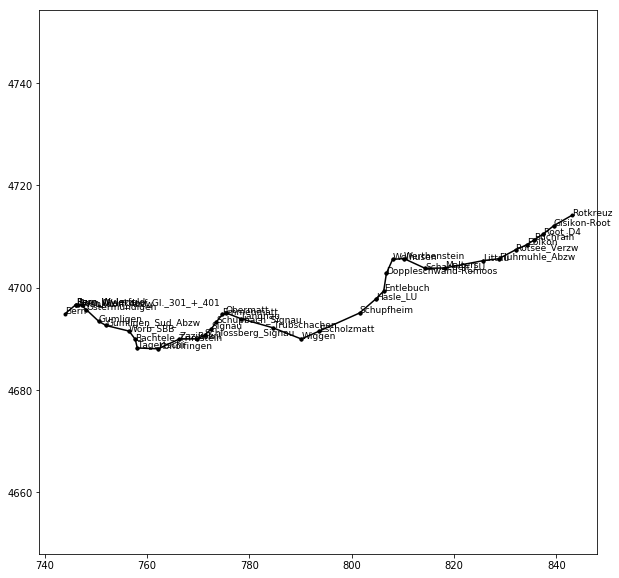

In [65]:
start = 'Rotkreuz'
goal = 'Bern'
sbb_map = UndirectedGraph(sbb.createMap())
problem = GraphProblem(start, goal, sbb_map)
node = greedy_algo(problem)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)

### A*

In [66]:
from heapq import heappush, heappop, heapify
def a_star(problem):
    root = Node(problem.initial)
    if problem.goal_test(root.state):
        return root
    children = root.expand(problem)
    frontier = []
    heapify(frontier)
    explored = set()
    
    aerial_dist_to_goal = sbb.get_distance_between(root.state, problem.goal)
    heappush(frontier, (root.path_cost + aerial_dist_to_goal, root))
    while True:
        node = heappop(frontier)[1]
        if problem.goal_test(node.state):
            return node
        explored.add(node)
        
        children = node.expand(problem)
        for child in children:
            if child not in explored:
                aerial_dist_to_goal = sbb.get_distance_between(child.state, problem.goal)
                f_func = aerial_dist_to_goal + child.path_cost
                i = 0
                for saved in frontier:
                    if child.state == saved[1].state:
                        if f_func < saved[0]:
                            frontier.remove(saved)
                    i+=1
                heappush(frontier, (f_func, child))

Bruglen_Spw
Oberruti
Gisikon-Root
Hunenberg_Chamleten
Root_D4
Rotkreuz
Buchrain
Gisikon-Root
Root_D4
Ebikon
Buchrain
Rotsee_Verzw
Fluhmuhle_Abzw
Ebikon
Littau
Rotsee_Verzw
Emmenbrucke
Gutsch_Abzw
Malters
Fluhmuhle_Abzw
Littau
Schachen_LU
Malters
Werthenstein
Wolhusen
Schachen_LU
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Menznau
Wolhusen
Daiwil
Wolhusen_Weid
Menznau
Willisau
Wolhusen
Entlebuch
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Wolhusen
Schachen_LU
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Menznau
Wolhusen
Daiwil
Gettnau_Guteranlage
Menznau
Wolhusen
Fluhmuhle_Abzw
Emmenbrucke_Gersag
Daiwil
Wolhusen_Weid
Daiwil
Wolhusen_Weid
Hubeli_LU
Emmenbrucke
Heimbach_Spw
Fluhmuhle_Abzw
Luzern_Verkehrshaus
Littau
Rotsee_Verzw
Emmenbrucke
Gutsch_Abzw
Malters
Fluhmuhle_Abzw
Littau
Schachen_LU
Malters
Werthenstein
Wolhusen
Schachen_LU
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Menznau
Wolhusen
Daiwil
Wolhusen_Weid
Menznau
Willisau
Wolhusen
Entlebuch
Doppleschwand-Romoos
Has

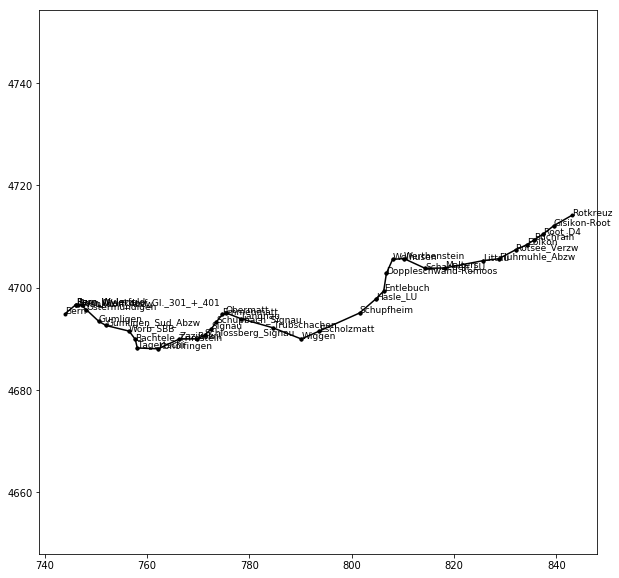

In [67]:
start = 'Rotkreuz'
goal = 'Bern'
sbb_map = UndirectedGraph(sbb.createMap())
problem = GraphProblem(start, goal, sbb_map)
node = a_star(problem)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)
print len(node.path())


# IDA*


In [68]:
def ida (node, bound, problem):
    aerial_dist_to_goal = sbb.get_distance_between(node.state, problem.goal)
    estimated_cost = node.path_cost + aerial_dist_to_goal 
    if problem.goal_test(node.state) or estimated_cost > bound:
        return node
    
    minimumcost = float("inf")
    for child in node.expand(problem):
        print(child.state)
        childIda = ida(child, bound, problem)
        if problem.goal_test(childIda.state):
            return childIda
        if sbb.get_distance_between(childIda.state, problem.goal) + childIda.path_cost < minimumcost:
            minimumcost = sbb.get_distance_between(childIda.state, problem.goal) + childIda.path_cost
    return node

def solve_ida(problem):
    node = Node(problem.initial)
    bound = sbb.get_distance_between(node.state, problem.goal)
    bound = bound * 1.065
    while not problem.goal_test(node.state):
        node = ida(node, bound, problem)
        if not problem.goal_test(node.state):
            bound = sbb.get_distance_between(node.state, problem.goal)
    return node

Bruglen_Spw
Immensee_West_Abzw
Freudenberg
Rotkreuz
Bruglen_Spw
Oberruti
Gisikon-Root
Root_D4
Buchrain
Root_D4
Ebikon
Buchrain
Rotsee_Verzw
Fluhmuhle_Abzw
Littau
Malters
Littau
Schachen_LU
Malters
Werthenstein
Wolhusen
Doppleschwand-Romoos
Wolhusen
Entlebuch
Werthenstein
Wolhusen
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Schachen_LU
Wolhusen_Weid
Menznau
Daiwil
Menznau
Willisau
Daiwil
Gettnau_Guteranlage
Wolhusen_Weid
Wolhusen
Doppleschwand-Romoos
Werthenstein
Wolhusen_Weid
Menznau
Wolhusen
Schachen_LU
Fluhmuhle_Abzw
Rotsee_Verzw
Emmenbrucke
Gutsch_Abzw
Ebikon
Gisikon-Root
Rotkreuz
Hunenberg_Chamleten
Oberruti
Rotkreuz
Sins
Muhlau
Oberruti
Gisikon-Root
Root_D4
Buchrain
Root_D4
Buchrain
Root_D4
Ebikon
Buchrain
Rotsee_Verzw
Fluhmuhle_Abzw
Littau
Malters
Littau
Schachen_LU
Malters
Werthenstein
Wolhusen
Doppleschwand-Romoos
Wolhusen
Entlebuch
Doppleschwand-Romoos
Hasle_LU
Schupfheim
Entlebuch
Werthenstein
Wolhusen
Doppleschwand-Romoos
Wolhusen
Entlebuch
Werthenstein
Wolhusen_Weid
Men

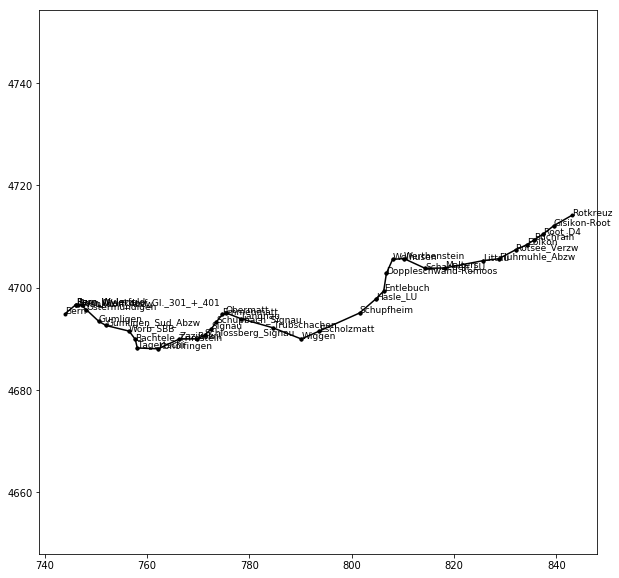

In [69]:
start = 'Rotkreuz'
goal = 'Bern'
sbb_map = UndirectedGraph(sbb.createMap())
problem = GraphProblem(start, goal, sbb_map)
node = solve_ida(problem)
plot_path(return_path_list(node), sbb)
print_info_about_search(node)
print len(node.path())

How do theses informed search algorithms perform on our problem? Create the following overview table for the example problem.


| Algorithm | start   | goal | cost | number of nodes visited | maximal stored nodes | complete | optimal |
|------|------|-----|-----|-----|-----|-----|-----|
| Greedy Search|Rotkreuz|Bern|107.354 O(b^m)| 39 | 88 | no | no
| A*|Rotkreuz|Bern|107.354 O(b^d)|39| 960 |yes | yes
| IDA*|Rotkreuz|Bern|107.954 O(lb)|39| 836 |yes| yes if h admissible
